In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
solar_data = pd.read_csv('Actual_25.15_-80.95_2006_UPV_227MW_5_Min.csv')
print(solar_data.head)

<bound method NDFrame.head of              LocalTime  Power(MW)
0       01/01/06 00:00        0.0
1       01/01/06 00:05        0.0
2       01/01/06 00:10        0.0
3       01/01/06 00:15        0.0
4       01/01/06 00:20        0.0
...                ...        ...
105115  12/31/06 23:35        0.0
105116  12/31/06 23:40        0.0
105117  12/31/06 23:45        0.0
105118  12/31/06 23:50        0.0
105119  12/31/06 23:55        0.0

[105120 rows x 2 columns]>


In [4]:
solar_data['LocalTime'] = pd.to_datetime(solar_data['LocalTime'])  # replace with actual column name
solar_data.set_index('LocalTime', inplace=True)

/var/folders/9j/p369mzm968lgx54036j350fm0000gn/T/ipykernel_60582/4219648438.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  solar_data['LocalTime'] = pd.to_datetime(solar_data['LocalTime'])  # replace with actual column name


In [5]:
solar_data['date'] = solar_data.index.date
solar_data['time'] = solar_data.index.time
solar_data['hour'] = solar_data.index.hour
solar_data['minute'] = solar_data.index.minute
solar_data['day_of_week'] = solar_data.index.day_name()
solar_data['month'] = solar_data.index.month_name()
print(solar_data.head())

                     Power(MW)        date      time  hour  minute  \
LocalTime                                                            
2006-01-01 00:00:00        0.0  2006-01-01  00:00:00     0       0   
2006-01-01 00:05:00        0.0  2006-01-01  00:05:00     0       5   
2006-01-01 00:10:00        0.0  2006-01-01  00:10:00     0      10   
2006-01-01 00:15:00        0.0  2006-01-01  00:15:00     0      15   
2006-01-01 00:20:00        0.0  2006-01-01  00:20:00     0      20   

                    day_of_week    month  
LocalTime                                 
2006-01-01 00:00:00      Sunday  January  
2006-01-01 00:05:00      Sunday  January  
2006-01-01 00:10:00      Sunday  January  
2006-01-01 00:15:00      Sunday  January  
2006-01-01 00:20:00      Sunday  January  


In [6]:
solar_data.info()
solar_data.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105120 entries, 2006-01-01 00:00:00 to 2006-12-31 23:55:00
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Power(MW)    105120 non-null  float64
 1   date         105120 non-null  object 
 2   time         105120 non-null  object 
 3   hour         105120 non-null  int32  
 4   minute       105120 non-null  int32  
 5   day_of_week  105120 non-null  object 
 6   month        105120 non-null  object 
dtypes: float64(1), int32(2), object(4)
memory usage: 5.6+ MB


,Power(MW),hour,minute
count,105120.000000,105120.000000,105120.000000
mean,44.494698,11.500000,27.500000
std,57.945774,6.922219,17.260345
min,0.000000,0.000000,0.000000
25%,0.000000,5.750000,13.750000
50%,0.000000,11.500000,27.500000
75%,100.300000,17.250000,41.250000
max,191.000000,23.000000,55.000000


In [7]:
Mean=solar_data['Power(MW)'].mean()
print(Mean)

44.49469843987823


In [8]:
print(solar_data.columns.tolist())


['Power(MW)', 'date', 'time', 'hour', 'minute', 'day_of_week', 'month']


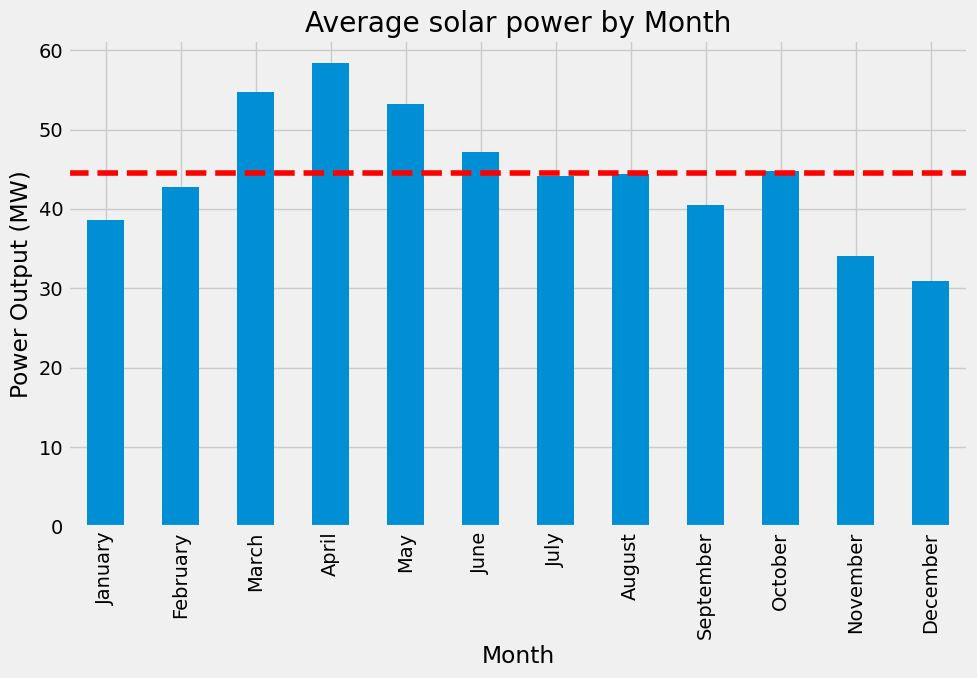

In [9]:
solar_data.groupby('month')['Power(MW)'].mean().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']).plot(kind='bar', figsize=(10,7), title='Average solar power by Month' )
plt.axhline(Mean, color='red', linestyle='--', label=f'Mean')
plt.xlabel('Month')
plt.ylabel('Power Output (MW)')
plt.tight_layout()
plt.show()

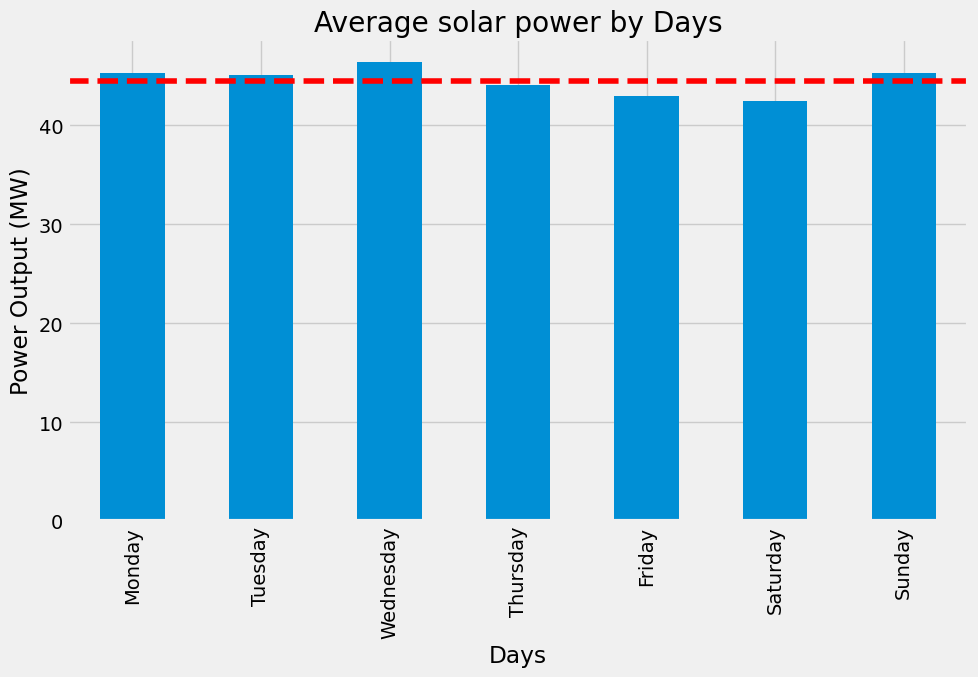

In [10]:
solar_data.groupby('day_of_week')['Power(MW)'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).plot(kind='bar', figsize=(10,7), title='Average solar power by Days' )
plt.axhline(Mean, color='red', linestyle='--', label=f'Mean')
plt.xlabel('Days')
plt.ylabel('Power Output (MW)')
plt.tight_layout()
plt.show()

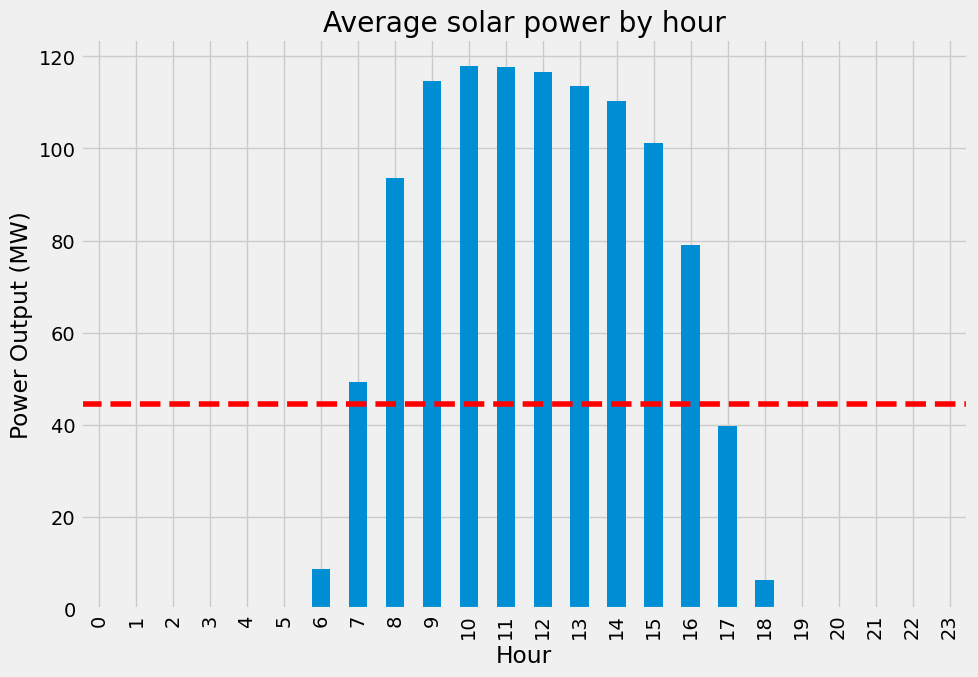

In [11]:
solar_data.groupby('hour')['Power(MW)'].mean().plot(kind='bar', figsize=(10,7), title='Average solar power by hour' )
plt.axhline(Mean, color='red', linestyle='--', label=f'Mean')
plt.xlabel('Hour')
plt.ylabel('Power Output (MW)')
plt.tight_layout()
plt.show()

In [12]:
solar_data.isnull().sum()

Power(MW)      0
date           0
time           0
hour           0
minute         0
day_of_week    0
month          0
dtype: int64

In [13]:
features = ['hour', 'day_of_week', 'month']
X = pd.get_dummies(solar_data[features])
y = solar_data['Power(MW)']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)


In [16]:
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))

Linear Regression RMSE: 57.31613789907573
Linear Regression R²: 0.018150895044840243


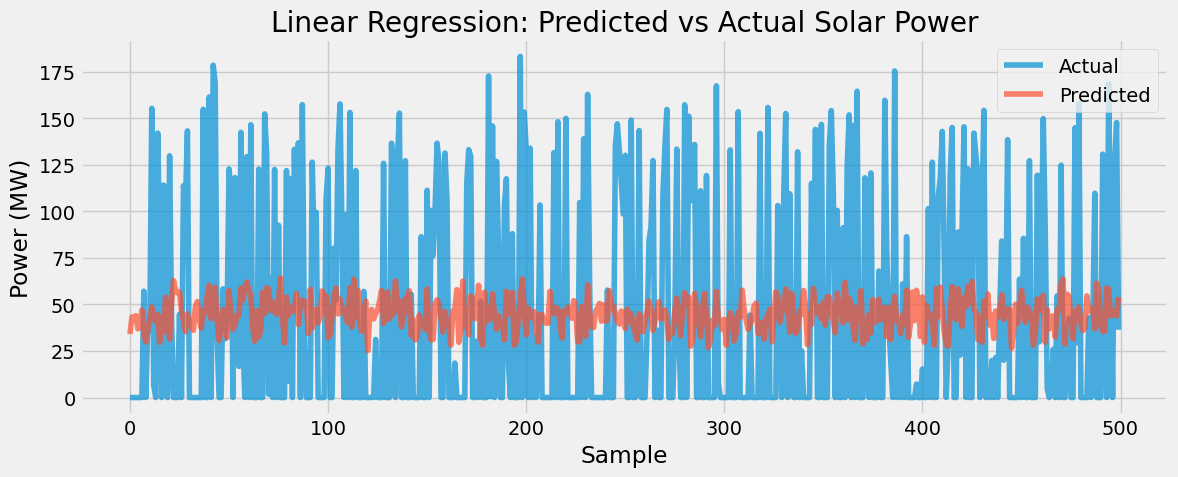

In [17]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:500], label='Actual', alpha=0.7)
plt.plot(y_pred_lr[:500], label='Predicted', alpha=0.7)
plt.title('Linear Regression: Predicted vs Actual Solar Power')
plt.xlabel('Sample')
plt.ylabel('Power (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
df_prophet = solar_data.reset_index()[['LocalTime', 'Power(MW)']]
df_prophet.columns = ['ds', 'y']

In [19]:
from prophet import Prophet

prophet_model = Prophet()
prophet_model.fit(df_prophet)


03:28:48 - cmdstanpy - INFO - Chain [1] start processing
03:29:01 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
future = prophet_model.make_future_dataframe(periods=288, freq='5min')  # 5min x 288 = 24 hours
forecast = prophet_model.predict(future)

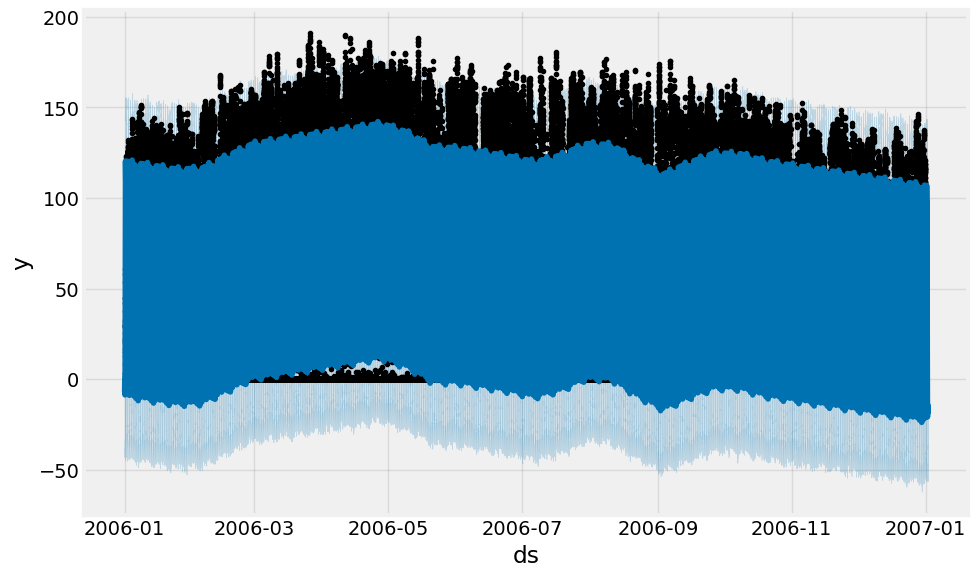

In [21]:
fig = prophet_model.plot(forecast)

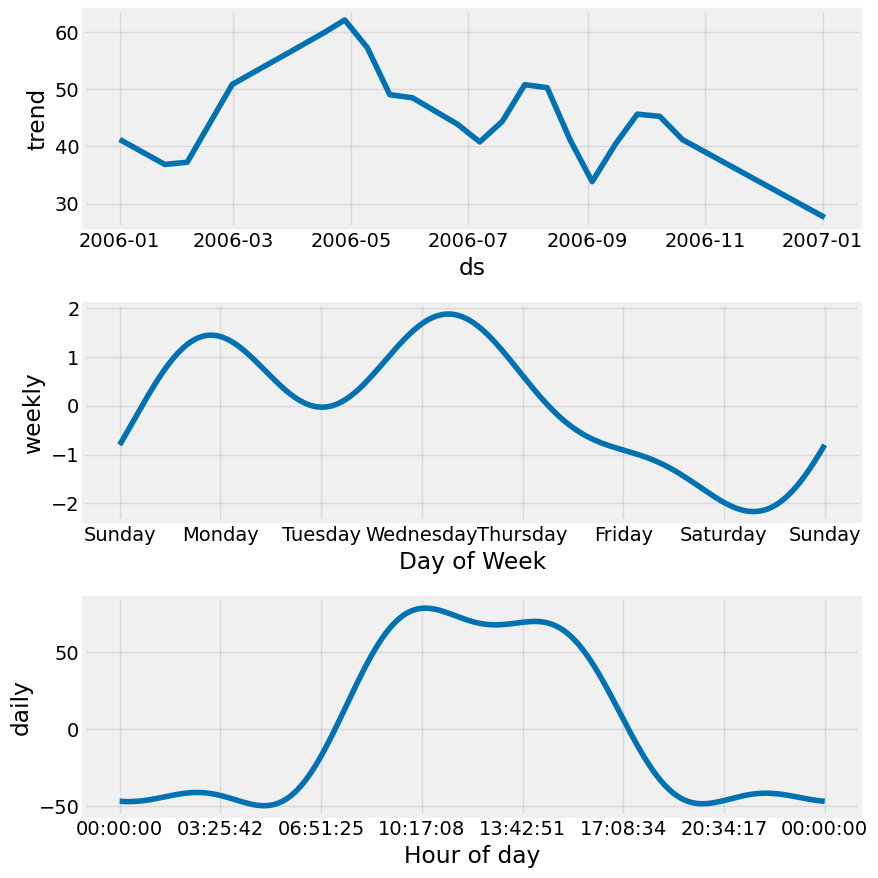

In [22]:
fig_components = prophet_model.plot_components(forecast)


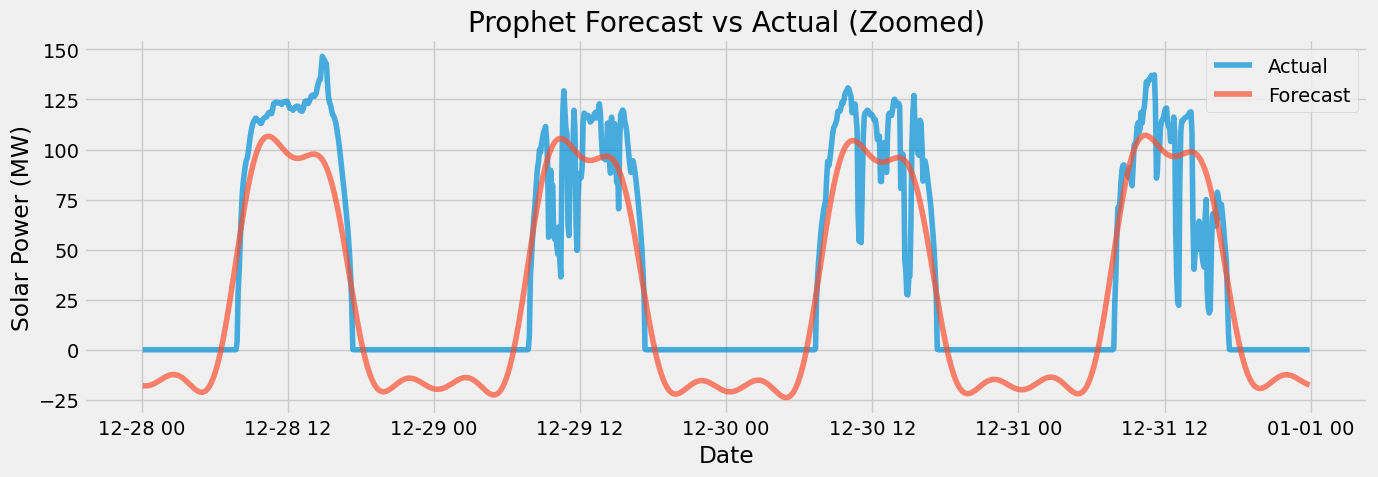

In [25]:
# Merge actual + forecast for comparison
merged = df_prophet.merge(forecast[['ds', 'yhat']], on='ds', how='left')

# Filter for last few days
subset = merged[merged['ds'] > '2006-12-28']  # Adjust date range as needed

plt.figure(figsize=(14,5))
plt.plot(subset['ds'], subset['y'], label='Actual', alpha=0.7)
plt.plot(subset['ds'], subset['yhat'], label='Forecast', alpha=0.7)
plt.title('Prophet Forecast vs Actual (Zoomed)')
plt.xlabel('Date')
plt.ylabel('Solar Power (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


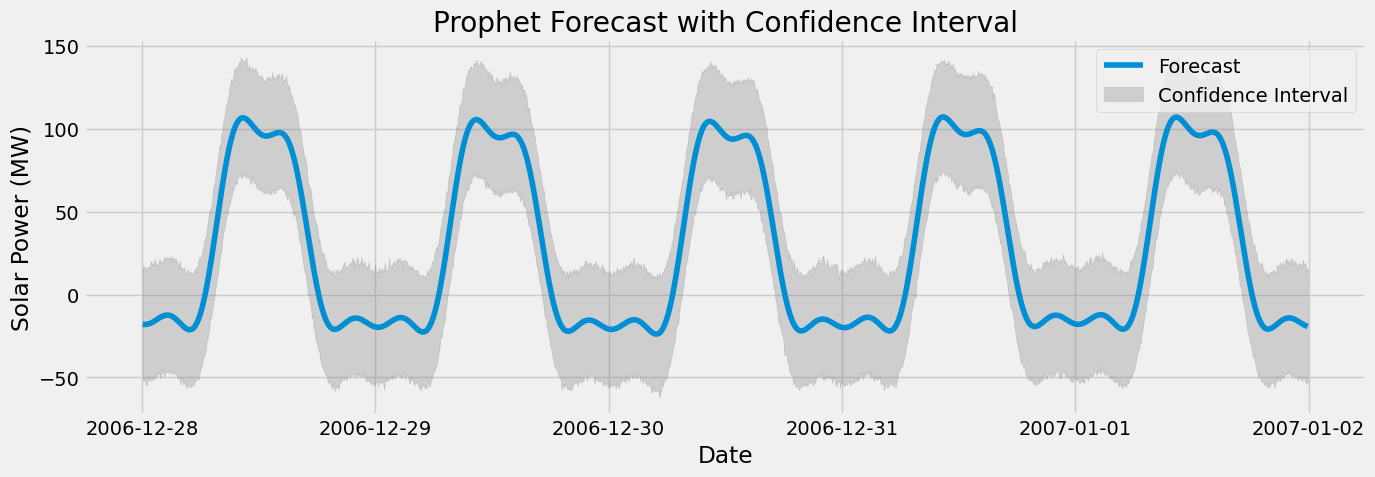

In [26]:
subset_forecast = forecast[forecast['ds'] > '2006-12-28']  # Adjust as needed

plt.figure(figsize=(14,5))
plt.plot(subset_forecast['ds'], subset_forecast['yhat'], label='Forecast')
plt.fill_between(
    subset_forecast['ds'],
    subset_forecast['yhat_lower'],
    subset_forecast['yhat_upper'],
    color='gray', alpha=0.3, label='Confidence Interval'
)
plt.title('Prophet Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Solar Power (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [27]:
df_prophet = solar_data.reset_index()[['LocalTime', 'Power(MW)']]
df_prophet.columns = ['ds', 'y']

# Fit Prophet
from prophet import Prophet
prophet_model = Prophet()
prophet_model.fit(df_prophet)

# Forecast
future = prophet_model.make_future_dataframe(periods=0, freq='5min')
forecast = prophet_model.predict(future)

# Merge predictions with actuals
merged_df = df_prophet.merge(forecast[['ds', 'yhat']], on='ds', how='inner')


03:35:39 - cmdstanpy - INFO - Chain [1] start processing
03:35:51 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
# Define threshold
threshold = df_prophet['y'].mean()

# Actual vs predicted class
merged_df['actual_class'] = (merged_df['y'] >= threshold).astype(int)
merged_df['predicted_class'] = (merged_df['yhat'] >= threshold).astype(int)

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = merged_df['actual_class']
y_pred = merged_df['predicted_class']

print("Prophet Classification Metrics:")
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))


Prophet Classification Metrics:
Accuracy: 0.9227264079147641
Precision: 0.8568360445987936
Recall: 0.9528189232450012
F1 Score: 0.9022820503566831


In [30]:
# Use same threshold
lr_y_test_class = (y_test >= threshold).astype(int)
lr_y_pred_class = (y_pred_lr >= threshold).astype(int)

print("Linear Regression Classification Metrics:")
print("Accuracy:", accuracy_score(lr_y_test_class, lr_y_pred_class))
print("Precision:", precision_score(lr_y_test_class, lr_y_pred_class))
print("Recall:", recall_score(lr_y_test_class, lr_y_pred_class))
print("F1 Score:", f1_score(lr_y_test_class, lr_y_pred_class))


Linear Regression Classification Metrics:
Accuracy: 0.54632800608828
Precision: 0.41965678627145087
Recall: 0.5455006337135615
F1 Score: 0.4743745178000662


In [31]:
import pandas as pd

results = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Linear Regression': [
        accuracy_score(lr_y_test_class, lr_y_pred_class),
        precision_score(lr_y_test_class, lr_y_pred_class),
        recall_score(lr_y_test_class, lr_y_pred_class),
        f1_score(lr_y_test_class, lr_y_pred_class)
    ],
    'Prophet': [
        accuracy_score(y_true, y_pred),
        precision_score(y_true, y_pred),
        recall_score(y_true, y_pred),
        f1_score(y_true, y_pred)
    ]
}

df_results = pd.DataFrame(results)
print(df_results)


      Metric  Linear Regression   Prophet
0   Accuracy           0.546328  0.922726
1  Precision           0.419657  0.856836
2     Recall           0.545501  0.952819
3   F1 Score           0.474375  0.902282


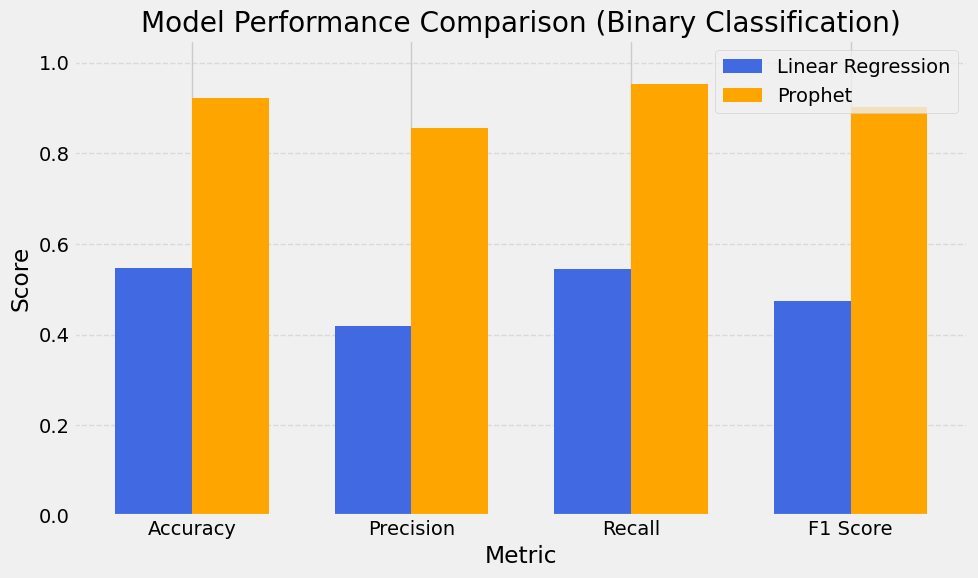

In [32]:
# Set the figure size
plt.figure(figsize=(10,6))

# Create grouped bar chart
x = df_results['Metric']
bar_width = 0.35
index = range(len(x))

plt.bar(index, df_results['Linear Regression'], width=bar_width, label='Linear Regression', color='royalblue')
plt.bar([i + bar_width for i in index], df_results['Prophet'], width=bar_width, label='Prophet', color='orange')

# Add labels and styling
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Model Performance Comparison (Binary Classification)')
plt.xticks([i + bar_width / 2 for i in index], x)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
